<a href="https://colab.research.google.com/github/DavidMercadoFaustino/Analyzing-Data-with-Python---IBM-DA0101EN/blob/master/Modulo_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estatistica Descritiva
Objetivos:


*   Descrever caracteristas basicas dos dados
*   Resumir os dados.




In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [63]:
df = pd.read_csv('/content/sample_data/clean_df.csv')

In [64]:
# Resumo estatistico usando pandas .describe()
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11.190476,Low,0,1,1,0,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11.190476,Low,0,1,1,0,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12.368421,Medium,0,1,1,0,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9.791667,Low,0,1,1,0,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,13.055556,Low,0,1,1,0,1,0


In [65]:
# Resumo estatistico de variáveis categoricas usando o .value_counts()
drive_wheels_counts = pd.DataFrame(df['drive-wheels'].value_counts())

In [66]:

drive_wheels_counts


,drive-wheels
fwd,118
rwd,75
4wd,8


Podemos também visualizar essas analise descritivas usando o Box Plot, que observaremos como a variavel se distribui em relação a média. 

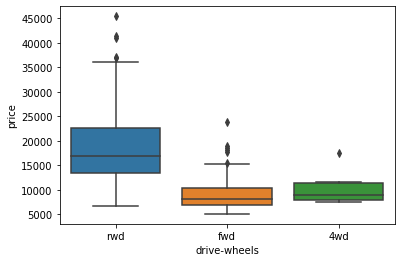

In [67]:
# Visualização utilizando o Box plot
sns.boxplot(x='drive-wheels', y='price', data=df)

Otra forma de visualizar é utilizando o Scatter Plot que conseguimos observar as relações entre duas variaveis observando a distribuição dos pontos dentro de um grafico.

Text(0, 0.5, 'Price')

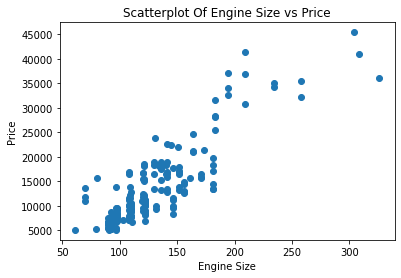

In [68]:
# Observação as relações entre as variaveis, utilizando o Scatter plot
y = df['price'] # No eixo 'X' sempre a variavel independente
x = df['engine-size'] # No eixo 'Y' a variavel dependente
plt.scatter(x,y)

plt.title('Scatterplot Of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

## Agrupando os dados
Usando o panda o metodo dataframe.Grouby(), Pivot(), Heatmap podemos:

*   Pode ser aplicado em variaveis categoricas
*   Pode agrupar dados dentro de categorias
*   Pode ser usado com uma ou multiplas variaveis

In [73]:
df_test = df[['drive-wheels','body-style', 'price']]

In [75]:
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [76]:
# Usando Metodo Pivot()
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

<function matplotlib.pyplot.show>

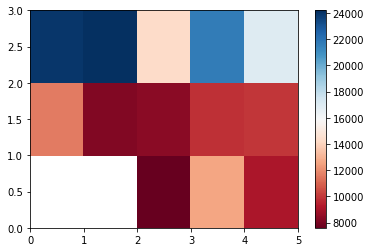

In [77]:
# Usando Heatmap
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show

## Correlação entre variáveis
relação entre as variáveis não significa uma relação de casualidade

(0.0, 53654.230256055635)

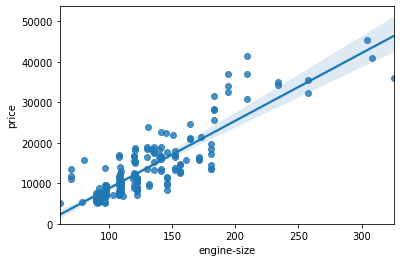

In [78]:
# Correlação positiva
sns.regplot(x='engine-size', y='price',data=df)
plt.ylim(0,)

(0.0, 48186.4953642637)

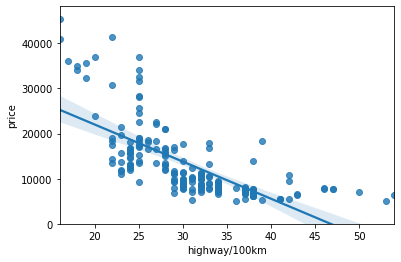

In [80]:
#correlação negativa
sns.regplot(x='highway/100km', y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

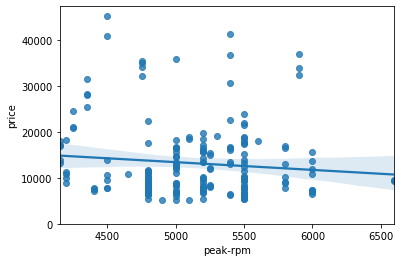

In [54]:
# Correlação fraca
sns.regplot(x='peak-rpm', y='price',data=df)
plt.ylim(0,)

## Correlação de Pearson
Mede a 'força' da correlação entre duas variáveis, por dois metodos:

Coefiente de correlação:
* Proximo de + 1 = Correlação forte positiva
* Proximo de - 1 = Correlação forte negativa
* Proxima de 0 = Sem correlação

P_value - mede a confiança no resultado do coeficiente
* P_value < 0,001 Forte confiança no resultado
* P_value < 0,05 Moderada confiança no resultado
* P_value < 0,1 Fraca confiança no resultado
* P_value > 0,1 Sem confiança no resultado

In [59]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

In [60]:
p_value

6.058444649710002e-48

In [61]:
pearson_coef

0.8096811975632288

## Analise da Variança (ANOVA)


In [83]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [84]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [85]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [86]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666
